In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob, os, re
import pandas # sorry, I don't usually let friends use this

In [15]:
data_folder = "./data"

In [16]:
filenames = glob.glob(os.path.join(data_folder, "*_*_*_?.npy"))

In [21]:
specs = ('what', str), ('dataset', str), ('ml_method', str), ('ho_method', str), ('seed', int)
pattern = r'\/(\w*)_(\w*)_(\w*)_(\w*)_(\d)\.npy'
matches = [re.search(pattern, filename) for filename in filenames]
all_info = [{spec_name: spec_type(value) for (spec_name, spec_type), value in zip(specs, match.groups())}
               for match in matches]
for info, filename in zip(all_info, filenames):
    info['filename'] = filename
df = pandas.DataFrame.from_records(all_info)
df

,dataset,filename,ho_method,ml_method,seed,what
0,newsgroups,./data/score_newsgroups_mnb_hyperopt_2.npy,hyperopt,mnb,2,score
1,newsgroups,./data/parameters_newsgroups_sgd_random_4.npy,random,sgd,4,parameters
2,housing,./data/parameters_housing_ridge_skopt_6.npy,skopt,ridge,6,parameters
3,newsgroups,./data/score_newsgroups_mnb_random_4.npy,random,mnb,4,score
4,housing,./data/score_housing_ridge_skopt_5.npy,skopt,ridge,5,score
5,housing,./data/score_housing_ridge_random_3.npy,random,ridge,3,score
6,housing,./data/score_housing_ridge_random_4.npy,random,ridge,4,score
7,housing,./data/parameters_housing_ridge_skopt_5.npy,skopt,ridge,5,parameters
8,newsgroups,./data/parameters_newsgroups_mnb_hyperopt_9.npy,hyperopt,mnb,9,parameters
9,newsgroups,./data/score_newsgroups_sgd_hyperopt_4.npy,hyperopt,sgd,4,score


In [38]:
# Make a dictionary aggregating numpy arrays for different seeds
# Dictionary key is tuple describing experiment

all_scores = dict()
all_parameters = dict()
all_seeds = dict()

for g, items in df.groupby(['dataset', 'ho_method', 'ml_method', 'seed']):
    dataset, ho_method, ml_method, seed = g
    if len(items) != 2:
        raise ValueError("There should only be two entries to this subdf ...")
    parameter_file = items[items['what'] == 'parameters']['filename'].iloc[0]
    score_file = items[items['what'] == 'score']['filename'].iloc[0]
    #print(parameter_file, score_file)
    parameters = np.load(parameter_file)
    scores = np.load(score_file)
    
    scores_list = all_scores[(dataset, ml_method, ho_method)] = all_scores.get(
                                                    (dataset, ml_method, ho_method), [])
    scores_list.append(scores)
    
    seeds_list = all_seeds[(dataset, ml_method, ho_method)] = all_seeds.get(
                                                    (dataset, ml_method, ho_method), [])
    seeds_list.append(seed)
    
    parameters_list = all_parameters[(dataset, ml_method, ho_method)] = all_parameters.get(
                                                    (dataset, ml_method, ho_method), [])
    parameters_list.append(parameters)


for g, scores in all_scores.items():
    all_scores[g] = np.array(scores)


In [39]:
all_cum_max_scores = dict()
for g, scores in all_scores.items():
    cum_maxs = list()
    for score in scores:
        cum_maxs.append([np.max(score[:i + 1]) for i in range(len(score))])
    cum_maxs = np.array(cum_maxs)
    all_cum_max_scores[g] = cum_maxs

In [40]:
g

('newsgroups', 'sgd', 'random')

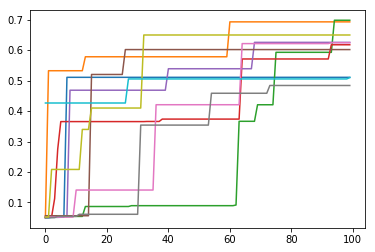

In [42]:
plt.plot(all_cum_max_scores[g].T)
pass

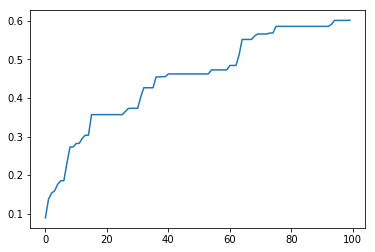

In [43]:
plt.plot(all_cum_max_scores[g].mean(0))
pass

In [48]:
unique_datasets = np.unique(df['dataset'].values)
unique_ho_methods = np.unique(df['ho_method'].values)
unique_ml_methods = np.unique(df['ml_method'].values)

newsgroups sgd hyperopt
newsgroups sgd random
newsgroups sgd skopt
housing ridge hyperopt
housing ridge random
housing ridge skopt


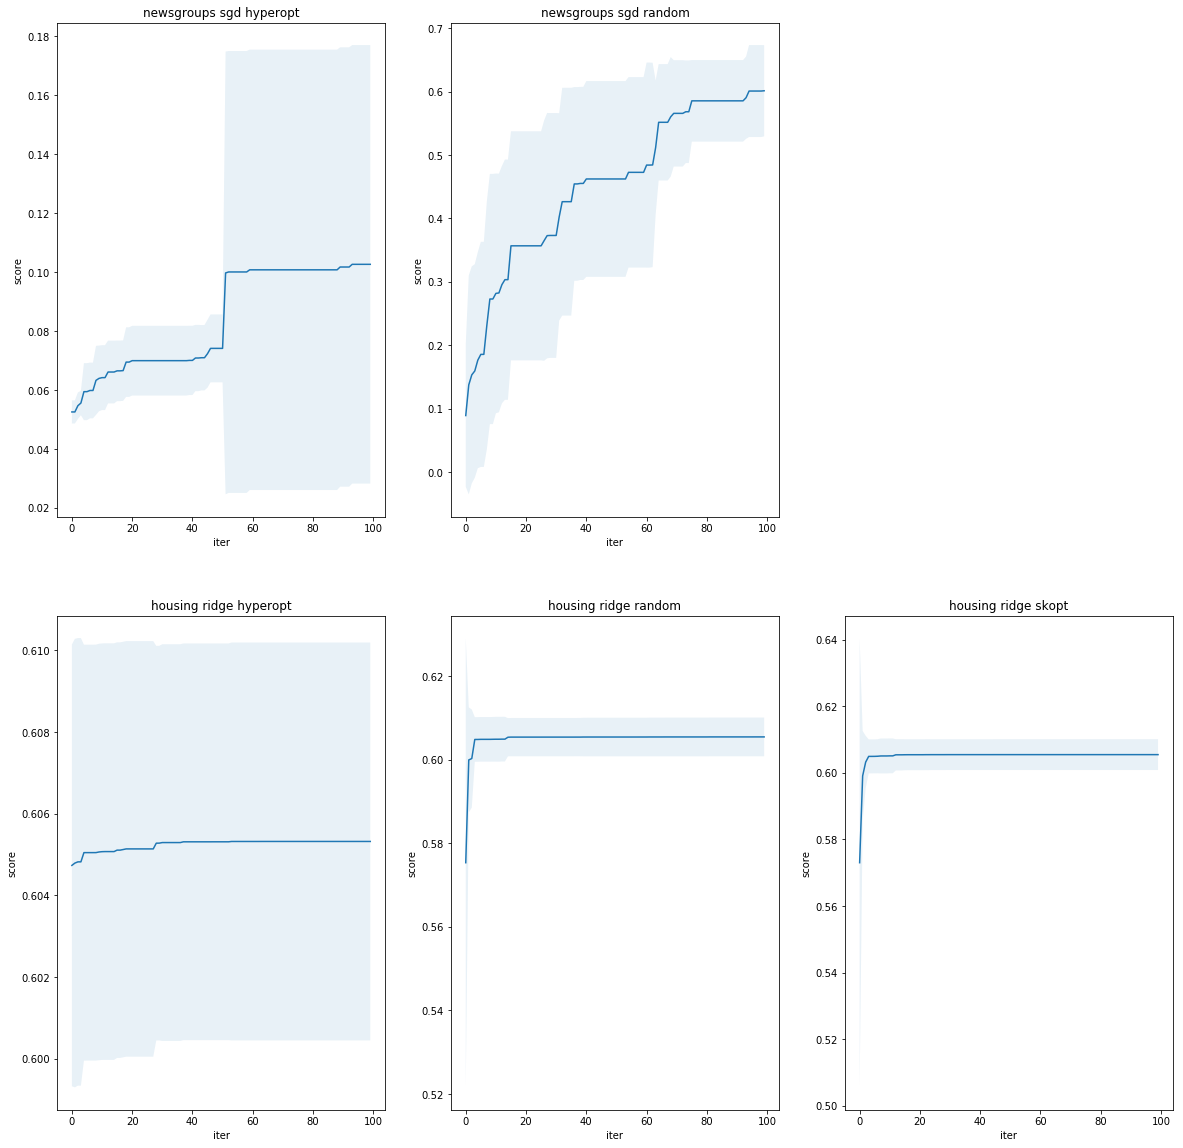

In [62]:
plt.figure(figsize=(20, 20))
plot_counter = 0

show = [('newsgroups', 'sgd'), ('housing', 'ridge')]
num_plot_rows = len(show)

for dataset, ml_method in show:
    for ho_method in unique_ho_methods:
        print(dataset, ml_method, ho_method)
        cum_max_scores = all_cum_max_scores.get((dataset, ml_method, ho_method), None)
        plot_counter += 1
        if cum_max_scores is not None:
            plt.subplot(num_plot_rows, len(unique_ho_methods), plot_counter)
            mean = cum_max_scores.mean(axis=0)
            std = cum_max_scores.std(axis=0)
            plt.plot(mean)
            plt.fill_between(np.arange(len(std)), mean - std, mean + std, alpha=.1)
            plt.xlabel("iter")
            plt.ylabel("score")
            plt.title(f"{dataset} {ml_method} {ho_method}")